# Penn State STAT501 - Applied Regression Models

![](https://www.engr.psu.edu/ae/thesis/portfolios/2014/gvl5037/penn%20state%20logo.png)

source: [Penn State Statistics 501](https://newonlinecourses.science.psu.edu/stat501/node/251/)

In [16]:
import pandas as pd
import numpy as np

# import plotting libraries

import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
plt.style.use('seaborn-white')

# Statistical Packages
import scipy.stats as stats
import statsmodels.api as sm
import statsmodels.formula.api as smf

---
# Lesson 1: Simple Linear Regression



## Example 1: Teen Birth Rate and Poverty Level 

source: [1.10 Further Example PSU STAT501](https://newonlinecourses.science.psu.edu/stat501/node/288/)

![](https://psmag.com/.image/c_limit%2Ccs_srgb%2Cq_auto:good%2Cw_600/MTI3NTgxOTc4Mjk0ODA4NTQ2/sad-piggy-bank.webp)

_(PHOTO: DOODER/[SHUTTERSTOCK](http://www.shutterstock.com/))_


The variables are y = year 2002 birth rate per 1000 females 15 to 17 years old and x = poverty rate, which is the percent of the state’s population living in households with incomes below the federally defined poverty level. _(Data source: Mind On Statistics, 3rd edition, Utts and Heckard)._

In [28]:
poverty = pd.read_table("https://newonlinecourses.science.psu.edu/stat501/sites/onlinecourses.science.psu.edu.stat501/files/examples/poverty/index.txt")
poverty.head()

,Location,PovPct,Brth15to17,Brth18to19,ViolCrime,TeenBrth
0,Alabama,20.1,31.5,88.7,11.2,54.5
1,Alaska,7.1,18.9,73.7,9.1,39.5
2,Arizona,16.1,35.0,102.5,10.4,61.2
3,Arkansas,14.9,31.6,101.7,10.4,59.9
4,California,16.7,22.6,69.1,11.2,41.1


The plot of the data below (birth rate on the vertical) shows a generally linear relationship, on average, with a positive slope. As the poverty level increases, the birth rate for 15 to 17 year old females tends to increase as well.

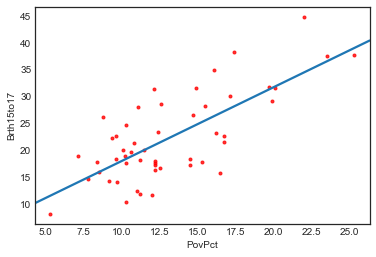

In [32]:
# Scatter plot least swares regression line added
sns.regplot(poverty.PovPct, poverty.Brth15to17, order = 1,
           ci = None, scatter_kws={'color':'r', 's':9})

In [33]:
#create fitted model
lm = smf.ols(formula='Brth15to17 ~ PovPct', data = poverty).fit()

print(lm.params,'\n')

Intercept    4.267293
PovPct       1.373345
dtype: float64 



#### Interpretation of the coefficients
With the _fitted line_ for regression superimposed on the data, the above output is the intercept and slope. 
- __Slope__ = 1.373 which means that 15 to 17 year old birth rate increate 1.973 units, on average, for each one unit (one percent) increate in the poverty rate


- __Intercept__ = 4.267 means that if there were states with pvoerty rate = 0, the predicted average for the 15 to 17 year old birth rate would be 4.267 for those states. _since there are no states with poverty rate = 0 this incerpretation of the incercept is not practiceally meaningul for this example. 



In [34]:
# r-squared
print("r-squared = ", lm.rsquared)

r-squared =  0.5333279627871969


#### Interpretation of the R-Squared
The value of r2 can be interpreted to mean that poverty rates "explain" 53.3% of the observed variation in the 15 to 17 year old average birth rates of the states.

--- 
### Other Notes From Lession 1

In [5]:
data = pd.read_csv("./data/skincancer.csv")
data.head()

,State,Lat,Mort,Ocean,Long
0,Alabama,33.0,219,1,87.0
1,Arizona,34.5,160,0,112.0
2,Arkansas,35.0,170,0,92.5
3,California,37.5,182,1,119.5
4,Colorado,39.0,149,0,105.5


Below is a scatterplot of the statistical relationship of the response variable y is the mortality due to skin cancer (number of deaths per 10 million people) and the predictor variable x is the latitude (degrees North) at the center of each of 49 states in the U.S.

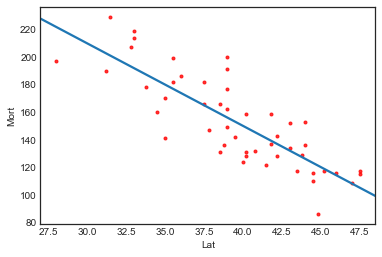

In [6]:
# Scatter plot of expense vs income with least swares regression line added

sns.regplot(data.Lat, data.Mort, order = 1,
           ci = None, scatter_kws={'color':'r', 's':9})

There appears to be a negative linear relationship between latitude and mortality due to skin cancer, but the relationship is not perfect.

In [13]:
# Ordinary Least Squares (ols) 

#create fitted model
lm = smf.ols(formula='Mort ~ Lat', data = data).fit()

print("r-squared = ", lm.rsquared)

r-squared =  0.6798295922599593


#### interpreting r-squared
we can say that 68% of the variation in the skin cancer mortality rate is reduced by taking into account latitude. 

Or we can say - with knownledge of what it really means - __that 68% of the variation in skin cancer mortality is _due to_ or is _explained by_ latitude__

### Perasons R

In [19]:
print("Pearson correlaiton of Lat and Mort = ", np.sqrt(lm.rsquared))

Pearson correlaiton of Lat and Mort =  0.8245177937800732


#### INterpreting Pearson's R

The output tells us that the correlation between skin cancer mortality and latitude is still -0.825.

---

In [7]:
hw = pd.read_table("./data/height_weight.txt")
hw.head()

,ht,wt
0,63,127
1,64,121
2,66,142
3,69,157
4,69,162


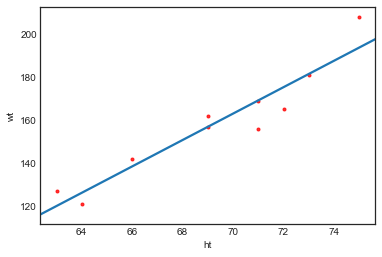

In [8]:

# Scatter plot of expense vs income with least swares regression line added

sns.regplot(hw.ht, hw.wt, order = 1,
           ci = None, scatter_kws={'color':'r', 's':9})

In [9]:
# Ordinary Least Squares (ols) 

#create fitted model
lm = smf.ols(formula='wt ~ ht', data = hw).fit()

print(lm.params,'\n')

# summary of the regression coefficents
print(lm.summary())

Intercept   -266.534395
ht             6.137581
dtype: float64 

                            OLS Regression Results                            
Dep. Variable:                     wt   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.884
Method:                 Least Squares   F-statistic:                     69.67
Date:                Wed, 16 Jan 2019   Prob (F-statistic):           3.21e-05
Time:                        11:23:50   Log-Likelihood:                -34.639
No. Observations:                  10   AIC:                             73.28
Df Residuals:                       8   BIC:                             73.88
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------

C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\scipy\stats\stats.py:1394: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  "anyway, n=%i" % int(n))


In [10]:
# ANOVA
anova_results = sm.stats.anova_lm(lm)
print(anova_results)

           df       sum_sq      mean_sq          F    PR(>F)
ht        1.0  5202.214048  5202.214048  69.666373  0.000032
Residual  8.0   597.385952    74.673244        NaN       NaN
